In [1]:
import numpy as  np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
cal_housing=fetch_california_housing()

In [4]:
X=pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y=cal_housing.target

In [5]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
df = pd.DataFrame(
        dict(MedInc=X['MedInc'], Price=cal_housing.target))

In [7]:
df

,MedInc,Price
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [8]:
X=np.array(df['MedInc'])
y=np.array(df['Price'])

In [9]:
X=X.reshape((-1,1))

In [10]:
model=LinearRegression().fit(X,y)

In [11]:
model.score(X,y)

0.4734474918071989

In [12]:
print(model.coef_)
print(model.intercept_)

[0.41793849]
0.4508557670326785


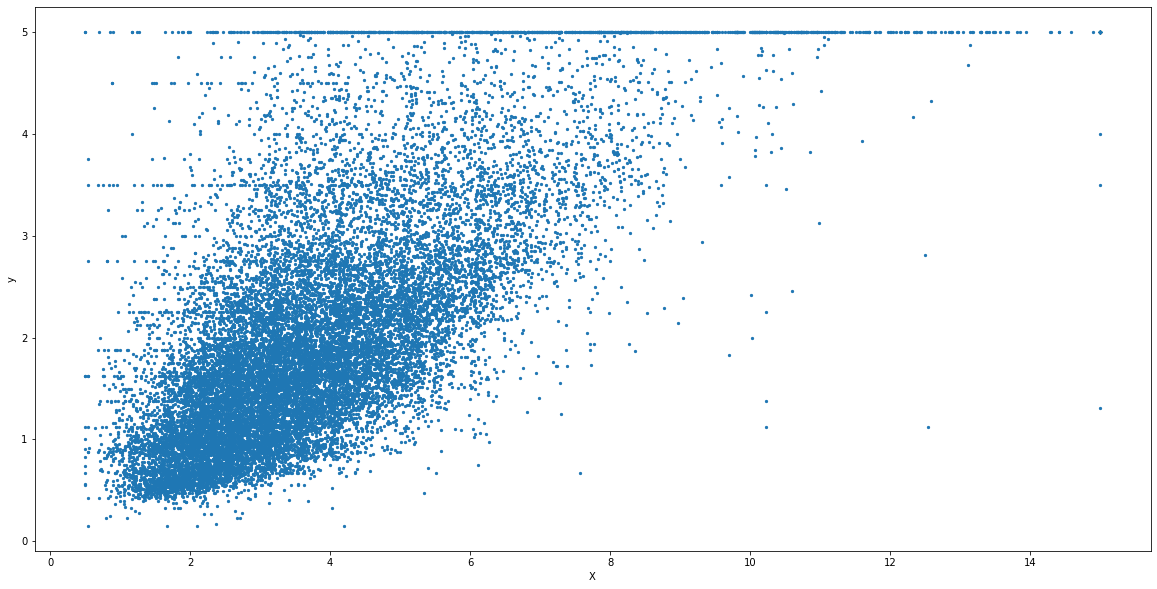

In [13]:
plt.scatter(X,y,s=5)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [14]:
mean_X=np.mean(X)
mean_y=np.mean(y)

In [15]:
n=len(X)

In [16]:
numer=0
denom=0
for i in range(n):
    numer += (X[i] - mean_X) * (y[i] - mean_y)
    denom += (X[i] - mean_X) ** 2
    coef = numer / denom
    intercept = mean_y - (coef * mean_X)

In [17]:
print(coef,intercept)

[0.41793849] [0.45085577]


In [18]:
max_x = np.max(X) 
min_x = np.min(X) 
x = np.linspace(min_x, max_x, 10)
y2 = intercept + coef * x 

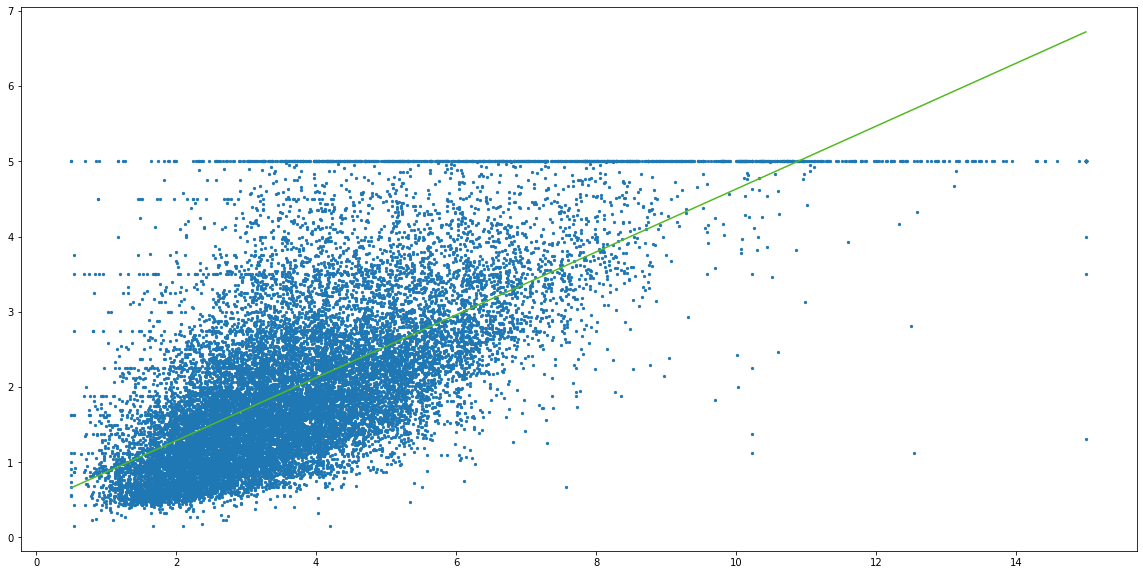

In [19]:
plt.scatter(X,y,s=5)
plt.plot(x, y2, color='#52b920', label='Regression Line')


In [ ]:
m=0
c=0
L_rate=0.01
max_iter=100
n=float(len(X))

for i in range(n):
    Y_pred=m*X+c
    d_m=(-2/n)*sum(X*(y-Y_pred))
    d_c=(-2/n)*sum(y-Y_pred)
    m=m-L_rate*d_m
    c=c-L_rate*d_c
print(m,c)

In [ ]:
m2=0
c2=0
L_rate2=0.01
n=float(len(X))

for i in range(n):
    m2+= -X[i]* (y[i]-(coef*X[i]+intercept))/abs(y[i]-(coef*X[i]+intercept))
    c2+=  -(y[i]-(coef*X[i]+intercept))/ abs(y[i]-(coef*X[i]+intercept))

coef -= (m2/float(n))*L_rate2
intercept -=(c2/float(n))*L_rate2

print(coef,intercept)